In [2]:
#THIS IS IMPORTANT. THE USER NEEDS TO IMPORT ALL NEEDED MODULES FOR THE JUPYTER TO WORK.
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install IPython


In [3]:
#LET US IMPORT ALL THE MODUles AFTER INSTALLING THEM.
import pandas as pd
from IPython.display import IFrame
import string
import ipywidgets
from matplotlib import pyplot as plt
df = pd.read_csv('data.csv')

#Droppping European Union
df.drop(df[(df['Country'] == 'European Union – 27 countries (from 01/02/2020)')].index, inplace=True)
#Droppping OECD Europ
df.drop(df[(df['Country'] == 'OECD - Europe')].index, inplace=True)
#Dropping OECD Asia
df.drop(df[(df['Country'] == 'OECD Asia Oceania')].index, inplace=True)
#Dropping Republic of China
df.drop(df[(df['Country'] == "China (People's Republic of)")].index, inplace=True)
#Dropping OECD Total
df.drop(df[(df['Country'] == "OECD - Total")].index, inplace=True)

#Cleaning Data Sets
df.dropna(inplace=True)


#Categorizing Dataset values 
country_list = []
for countries in df["Country"]:
    if countries not in country_list:
        country_list.append(countries)

gases_list = []

for gases in df["Pollutant"]:
    if gases not in gases_list:
        gases_list.append(gases)

years_list = []

for years in df["Year"]:
    if years not in years_list:
        years_list.append(years)


unit_code_list = []

for unit_cod in df["Unit Code"]:
    if unit_cod not in unit_code_list:
        unit_code_list.append(unit_cod)



variable_list = []

for variable in df["Variable"]:
    if variable not in variable_list:
            variable_list.append(variable)


powercode_list = []

for code in df["Unit"]:
    if code not in powercode_list:
            powercode_list.append(code)            
                                         
powercode_list_graph = powercode_list
      
            

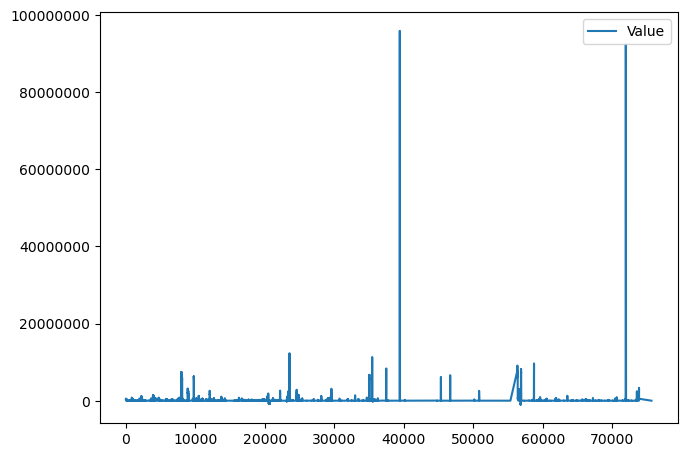

In [4]:
#Plotting all values of dataset. The x axis is the frequency, while the y axis is the value.
df.plot(y=['Value'],kind="line")
plt.tight_layout()
plt.ticklabel_format(style='plain')

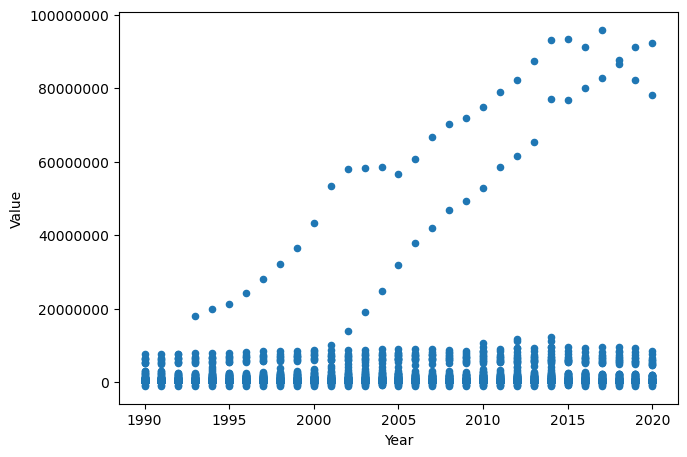

In [5]:
#Plotting all values of dataset. The x axis is the year, while the y axis is the value. This is a scatterfield.
df.plot(x='Year',y='Value',kind="scatter")
plt.tight_layout()
plt.ticklabel_format(style='plain')

In [6]:
#MAKE A CERTAIN GUI FOR COUNTRY AND YEAR PICKER.
year_picker = ipywidgets.Dropdown(
    options=years_list,
    description='Year:',
    disable=False
)

country_picker = ipywidgets.Dropdown(
    options=country_list,
    description='Country:',
    disable=False
)

def showYear(year):
    chosenYearData = df[df['Year'].astype(str).str.contains(f"{year}")]
    def showCountry(country):
        chosenCountryData = chosenYearData[chosenYearData['Country'].astype(str).str.contains(f"{country}")]
        chosenCountryData.plot(y=['Value'], kind="line",color = "red")
        plt.tight_layout()
        plt.ticklabel_format(style='plain')
        plt.xlabel("Average Number per case")
        plt.ylabel(f"Amount of Gases in {country} in {year} in Tonnes")
        plt.show()
    ipywidgets.interact(showCountry,country = country_picker)

ipywidgets.interact(showYear,year = year_picker)

interactive(children=(Dropdown(description='Year:', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1…

<function __main__.showYear(year)>

In [7]:
#make a year picker
year_picker = ipywidgets.Dropdown(
    options=years_list,
    description='Year:',
    disable=False
)
#make a pollutant picker

pollutant_picker = ipywidgets.Dropdown(
    options=gases_list,
    description='Pollutant:',
    disable=False
)
#make a unit picker

unit_picker = ipywidgets.Dropdown(
    options=powercode_list_graph,
    description='Unit:',
    disable=False
)
#make a country picker

country_picker = ipywidgets.Dropdown(
    options=country_list,
    description='Country:',
    disable=False
)
#this method is a method that puts in all information from the input of the user.
def showYear(year):
    chosenYearData = df[df['Year'].astype(str).str.contains(f"{year}")]
    def showPollutant(pollutant):
        chosenPollutantData = chosenYearData[chosenYearData['Pollutant'].astype(str).str.contains(f"{pollutant}")]
        def showAmount(unit):
                chosenAmountData = chosenPollutantData[chosenPollutantData['Unit'].astype(str).str.contains(f"{unit}")]
                chosenAmountData.plot(y=['Value'], kind="hist",color = "green")
                plt.tight_layout()
                plt.ticklabel_format(style='plain')
                plt.xlabel("Average Number per case")
                plt.ylabel(f"Amount of Gases in {unit}")
                plt.show()
        ipywidgets.interact(showAmount,unit = unit_picker)
    ipywidgets.interact(showPollutant,pollutant = pollutant_picker)
        
ipywidgets.interact(showYear,year = year_picker)

interactive(children=(Dropdown(description='Year:', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1…

<function __main__.showYear(year)>

In [8]:
#THIS IS SIMILAR TO OTHER GUI. IT WAS THE SAME CONCEPT BUT WAS EDITED WITH THIER RESPECTIVE DATABASES
year_picker = ipywidgets.Dropdown(
    options=years_list,
    description='Year:',
    disable=False
)

pollutant_picker = ipywidgets.Dropdown(
    options=gases_list,
    description='Pollutant:',
    disable=False
)

unit_picker = ipywidgets.Dropdown(
    options=powercode_list_graph,
    description='Unit:',
    disable=False
)

def showYear(year):
    chosenYearData = df[df['Year'].astype(str).str.contains(f"{year}")]
    def showPollutant(pollutant):
        chosenPollutantData = chosenYearData[chosenYearData['Pollutant'].astype(str).str.contains(f"{pollutant}")]
        def showCountry(country):
                    chosenCountryData = chosenPollutantData[chosenPollutantData['Country'].astype(str).str.contains(f"{country}")]
                    chosenCountryData.plot(y=['Value'], kind="line",color = "orange")
                    plt.tight_layout()
                    plt.ticklabel_format(style='plain')
                    plt.xlabel("Average Number per case")
                    plt.ylabel(f"Amount of Gases in {country} in {year} in Tonnes")
                    plt.show()
        ipywidgets.interact(showCountry,country = country_picker)
    ipywidgets.interact(showPollutant,pollutant = pollutant_picker)    
ipywidgets.interact(showYear,year = year_picker)

interactive(children=(Dropdown(description='Year:', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1…

<function __main__.showYear(year)>